# Use of Scalogram to represent data

In [29]:
from py_files import importData

data_path  = "/MIMII/RawData/+6dB/" # fan/id_00/abnormal'
user_path = 'C:/Users/carbo/Documents/'
writer_path = 'C:/Users/carbo/Documents/MIMII/Data/' + '+6dB' +'/PSD/'
CHANNELS = {"fan" : 5,"pump": 3,"valve" : 1, "slider" : 7, "test" : 5} # il faudrait vérifier que je sélectionne les bons channels, pour le moment ça fera l'affaire
IDS = [["id_00"],["id_02"], ["id_04"], ["id_06"]]
EPOCHS = 50
BATCH = 512

hyper_param = {"machine_name" : "test", 
                "method_name" : "psd",
                "IDchosen" : 3,
                "max_freq" : 3000,
                "channel": 4
                }

ID= "id_02"

importer_RawData_normal = importData.AudioDataImporter(user_path, data_path, ID, hyper_param, "normal")
importer_RawData_abnormal = importData.AudioDataImporter(user_path,data_path,ID,hyper_param, "abnormal")

hyper_param, raw_data_normal = importer_RawData_normal.foo()
hyper_param, raw_data_abnormal = importer_RawData_abnormal.foo()

hyper_param

{'machine_name': 'test',
 'method_name': 'psd',
 'IDchosen': 3,
 'max_freq': 3000,
 'channel': 4,
 'file_count_normal': 21,
 'fs': 16000,
 'file_count_abnormal': 4}

In [30]:
from ssqueezepy import cwt
from ssqueezepy.visuals import plot, imshow

In [31]:
import numpy as np
def compute( raw_data):
        """ Process the data """
        wx_list = []
        scales_list = []
        for data_vector in raw_data: 
            Wx, scales = cwt(data_vector, 'morlet')
            wx_list.append(np.array([abs(x) for x in Wx]))
            scales_list.append(np.array([abs(x) for x in scales]))
        return wx_list, scales_list
    
Wx_list, scales_list  = compute(raw_data_normal)

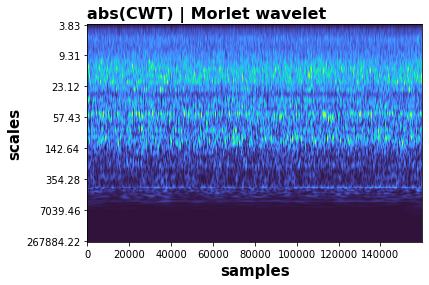

In [32]:
ID = 7

wx_test,scales_test = Wx_list[ID], scales_list[ID]

imshow(wx_test, yticks=scales_test, abs=1,
       title="abs(CWT) | Morlet wavelet",
       ylabel="scales", xlabel="samples")

## Commentaires

Plusieurs remarques et pistes à explorer :
1) Que représente les axes ? X = le nombre de samples dans le fichier audio , mais quid de Y ?
2) Comment se fait-il que l'ouput soit un fichier [294 x 160000] ? Ces features ne sont pas directement exploitable !
3) Par quel process peut-on créer des features exploitables en utilisant le scalogram ?